In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#FCN
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory
data_dir = '/content/drive/MyDrive/Pretrained dataset'

# Define image dimensions and batch size
img_height, img_width = 256, 256
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate batches of training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Count the number of classes
num_classes = len(train_generator.class_indices)

# Define the FCN architecture
model = models.Sequential([
    # Define your convolutional layers here
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Adjust the batch size if needed
batch_size = 8  # Adjust as needed

# Set steps_per_epoch to None to automatically determine steps based on dataset size
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=None,  # Automatically determine steps
    validation_steps=None  # Automatically determine validation steps
)


# Save the model
model.save('fetal_heart_classification_model.h5')


Found 99 images belonging to 6 classes.
Found 21 images belonging to 6 classes.
Epoch 1/3
4/4 [==============================] - 44s 7s/step - loss: 1.1576 - accuracy: 0.5960 - val_loss: 0.8611 - val_accuracy: 0.8095
Epoch 2/3
4/4 [==============================] - 16s 5s/step - loss: 0.4049 - accuracy: 0.8788 - val_loss: 0.8971 - val_accuracy: 0.8571
Epoch 3/3
4/4 [==============================] - 15s 4s/step - loss: 0.1162 - accuracy: 0.9697 - val_loss: 0.9992 - val_accuracy: 0.7619


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


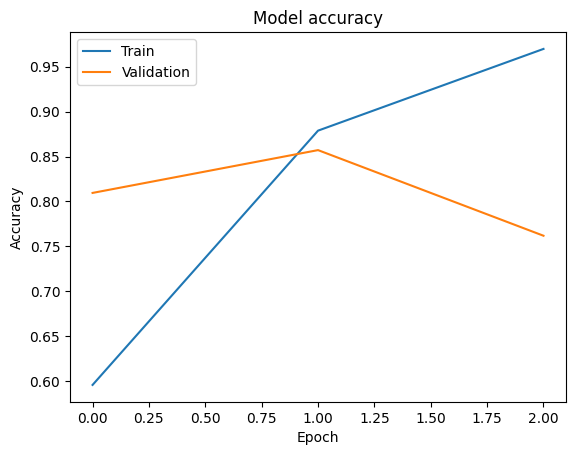

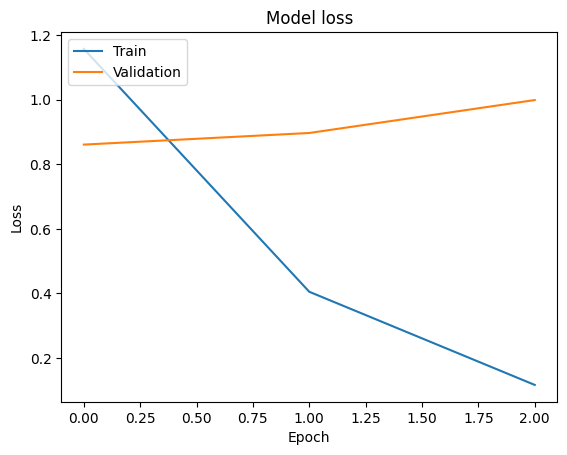

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Alexnet
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory
data_dir = '/content/drive/MyDrive/Pretrained dataset'

# Define image dimensions and batch size
img_height, img_width = 256, 256
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate batches of training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Count the number of classes
num_classes = len(train_generator.class_indices)

# Define the AlexNet architecture
model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Adjust the batch size if needed
batch_size = 8  # Adjust as needed

# Set steps_per_epoch to None to automatically determine steps based on dataset size
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=None,  # Automatically determine steps
    validation_steps=None  # Automatically determine validation steps
)

# Save the model
model.save('alexnet_fetal_heart_classification_model.h5')


Found 99 images belonging to 8 classes.
Found 21 images belonging to 8 classes.
Epoch 1/10
4/4 [==============================] - 29s 6s/step - loss: 6.5561 - accuracy: 0.1717 - val_loss: 1.9847 - val_accuracy: 0.2857
Epoch 2/10
4/4 [==============================] - 26s 6s/step - loss: 1.9532 - accuracy: 0.2727 - val_loss: 1.7907 - val_accuracy: 0.2857
Epoch 3/10
4/4 [==============================] - 28s 9s/step - loss: 1.8299 - accuracy: 0.2727 - val_loss: 1.6720 - val_accuracy: 0.2857
Epoch 4/10
4/4 [==============================] - 25s 6s/step - loss: 1.8877 - accuracy: 0.3131 - val_loss: 1.4822 - val_accuracy: 0.4762
Epoch 5/10
4/4 [==============================] - 25s 8s/step - loss: 1.7422 - accuracy: 0.4040 - val_loss: 1.7653 - val_accuracy: 0.4762
Epoch 6/10
4/4 [==============================] - 25s 6s/step - loss: 1.7334 - accuracy: 0.3131 - val_loss: 1.5462 - val_accuracy: 0.3333
Epoch 7/10
4/4 [==============================] - 24s 6s/step - loss: 1.5488 - accuracy: 0.3

In [3]:
#MobileNet
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet

# Define data directory
data_dir = '/content/drive/MyDrive/Pretrained'

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate batches of training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Count the number of classes
num_classes = len(train_generator.class_indices)

# Generate batches of validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained MobileNet model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
mobilenet_base.trainable = False

# Add classification layers on top of MobileNet
model = models.Sequential([
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Adjust the batch size if needed
batch_size = 8  # Adjust as needed

# Set steps_per_epoch to None to automatically determine steps based on dataset size
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=validation_generator,
    steps_per_epoch=None,  # Automatically determine steps
    validation_steps=None  # Automatically determine validation steps
)

# Save the model
model.save('mobilenet_fetal_heart_classification_model.h5')


Found 99 images belonging to 6 classes.
Found 21 images belonging to 6 classes.
Epoch 1/8
4/4 [==============================] - 12s 3s/step - loss: 1.7774 - accuracy: 0.2929 - val_loss: 0.8208 - val_accuracy: 0.6190
Epoch 2/8
4/4 [==============================] - 7s 1s/step - loss: 1.0655 - accuracy: 0.6061 - val_loss: 0.3613 - val_accuracy: 0.9524
Epoch 3/8
4/4 [==============================] - 8s 3s/step - loss: 0.7280 - accuracy: 0.7980 - val_loss: 0.2372 - val_accuracy: 0.9524
Epoch 4/8
4/4 [==============================] - 8s 2s/step - loss: 0.5357 - accuracy: 0.8081 - val_loss: 0.2441 - val_accuracy: 1.0000
Epoch 5/8
4/4 [==============================] - 7s 1s/step - loss: 0.4326 - accuracy: 0.9091 - val_loss: 0.1648 - val_accuracy: 1.0000
Epoch 6/8
4/4 [==============================] - 8s 1s/step - loss: 0.3512 - accuracy: 0.9091 - val_loss: 0.1419 - val_accuracy: 0.9524
Epoch 7/8
4/4 [==============================] - 6s 2s/step - loss: 0.3274 - accuracy: 0.9192 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


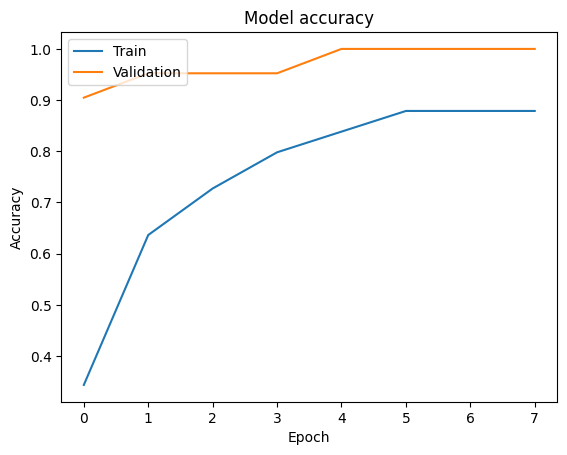

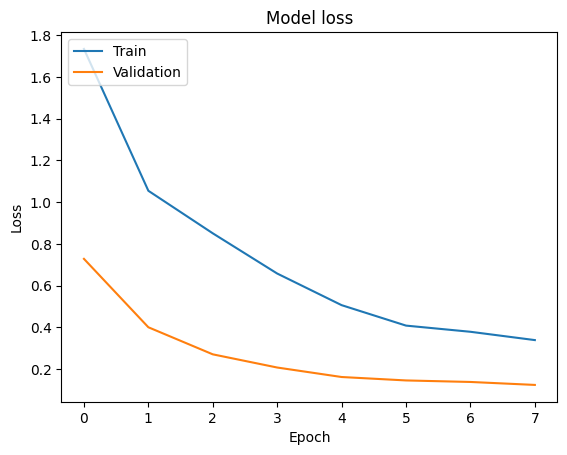

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#Unet
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory
data_dir = '/content/drive/MyDrive/Pretrained dataset'

# Define image dimensions and batch size
img_height, img_width = 256, 256
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate batches of training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='input',  # Use 'input' for UNet
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='input',  # Use 'input' for UNet
    subset='validation'
)

# Define UNet architecture
def unet(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up1 = layers.UpSampling2D(size=(2, 2))(conv3)
    up1 = layers.Conv2D(128, 2, activation='relu', padding='same')(up1)
    merge1 = layers.concatenate([conv2, up1], axis=3)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge1)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up2 = layers.UpSampling2D(size=(2, 2))(conv4)
    up2 = layers.Conv2D(64, 2, activation='relu', padding='same')(up2)
    merge2 = layers.concatenate([conv1, up2], axis=3)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge2)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = layers.Conv2D(3, 1, activation='sigmoid')(conv5)  # Adjust output channels as needed

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Instantiate the model
model = unet(input_shape=(img_height, img_width, 3))

# Compile the model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error loss is common for image reconstruction tasks
              metrics=['accuracy'])  # Not typically used for this task but can be included for monitoring

# Train the model
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=None,  # Automatically determine steps
    validation_steps=None  # Automatically determine validation steps
)

# Save the model
model.save('unet_fetal_heart_segmentation_model.h5')


Found 99 images belonging to 6 classes.
Found 21 images belonging to 6 classes.
Epoch 1/3
3/4 [=====================>........] - ETA: 1:09 - loss: 0.2462 - accuracy: 0.8128

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
